In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
from unicodedata import normalize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from utils import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
df = pd.read_csv('df_w_sentiments_nov17_franyang.csv')

In [9]:
# Lower case
df['Review'] = df['Review'].astype(str).str.lower()

# Tokenization
regexp = RegexpTokenizer('\w+')

df['review_token']=df['Review'].apply(regexp.tokenize)
df[['Review','review_token']].head(3)

,Review,review_token
0,tinder would be so much better if we could spe...,"[tinder, would, be, so, much, better, if, we, ..."
1,still doesn't correctly notify matches or mess...,"[still, doesn, t, correctly, notify, matches, ..."
2,love it!,"[love, it]"


In [16]:
# Remove stopwords

stopwords = nltk.corpus.stopwords.words("english")
df['review_token_sw'] = df['review_token'].apply(lambda x: [item for item in x if item not in stopwords])
df[['Review','review_token','review_token_sw']].head(3)

,Review,review_token,review_token_sw
0,tinder would be so much better if we could spe...,"[tinder, would, be, so, much, better, if, we, ...","[tinder, would, much, better, could, specify, ..."
1,still doesn't correctly notify matches or mess...,"[still, doesn, t, correctly, notify, matches, ...","[still, correctly, notify, matches, messages, ..."
2,love it!,"[love, it]",[love]


In [17]:
# Remove infrequent words
df['review_string'] = df['review_token_sw'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['review_token_sw', 'review_string']].head()

,review_token_sw,review_string
0,"[tinder, would, much, better, could, specify, ...",tinder would much better could specify race lo...
1,"[still, correctly, notify, matches, messages, ...",still correctly notify matches messages monopo...
2,[love],love
3,"[good, app]",good app
4,"[tested, originally, noticing, flux, 14, 20, e...",tested originally noticing flux escorts using ...


In [20]:
# Create a list of all words
all_words = ' '.join([word for word in df['review_string']])

# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

#Create a frequency distribution which records the number of times each word has occurred

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'app': 140046, 'people': 48871, 'good': 45414, 'get': 37522, 'like': 37492, 'tinder': 37013, 'great': 28876, 'matches': 26804, 'even': 26715, 'time': 25956, ...})

In [21]:
df['review_string_fdist'] = df['review_token_sw'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

df[['Review', 'review_token_sw', 'review_string', 'review_string_fdist']].head()

,Review,review_token_sw,review_string,review_string_fdist
0,tinder would be so much better if we could spe...,"[tinder, would, much, better, could, specify, ...",tinder would much better could specify race lo...,tinder would much better could specify race lo...
1,still doesn't correctly notify matches or mess...,"[still, correctly, notify, matches, messages, ...",still correctly notify matches messages monopo...,still correctly notify matches messages monopo...
2,love it!,[love],love,love
3,good app.,"[good, app]",good app,good app
4,just tested after originally noticing a flux ;...,"[tested, originally, noticing, flux, 14, 20, e...",tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...


In [25]:
# Lemmatization

wordnet_lem = WordNetLemmatizer()

df['review_string_lem'] = df['review_string_fdist'].apply(wordnet_lem.lemmatize)
df[['review_token_sw', 'review_string', 'review_string_fdist','review_string_lem']].head()

,review_token_sw,review_string,review_string_fdist,review_string_lem
0,"[tinder, would, much, better, could, specify, ...",tinder would much better could specify race lo...,tinder would much better could specify race lo...,tinder would much better could specify race lo...
1,"[still, correctly, notify, matches, messages, ...",still correctly notify matches messages monopo...,still correctly notify matches messages monopo...,still correctly notify matches messages monopo...
2,[love],love,love,love
3,"[good, app]",good app,good app,good app
4,"[tested, originally, noticing, flux, 14, 20, e...",tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...


In [43]:
# Stemming
ps = PorterStemmer()
df['review_string_lem_stem'] = df['review_string_lem'].apply(ps.stem)
df[['review_token_sw', 'review_string', 'review_string_fdist','review_string_lem','review_string_lem_stem']].head()

,review_token_sw,review_string,review_string_fdist,review_string_lem,review_string_lem_stem
0,"[tinder, would, much, better, could, specify, ...",tinder would much better could specify race lo...,tinder would much better could specify race lo...,tinder would much better could specify race lo...,tinder would much better could specify race lo...
1,"[still, correctly, notify, matches, messages, ...",still correctly notify matches messages monopo...,still correctly notify matches messages monopo...,still correctly notify matches messages monopo...,still correctly notify matches messages monopo...
2,[love],love,love,love,love
3,"[good, app]",good app,good app,good app,good app
4,"[tested, originally, noticing, flux, 14, 20, e...",tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...,tested originally noticing flux escorts using ...


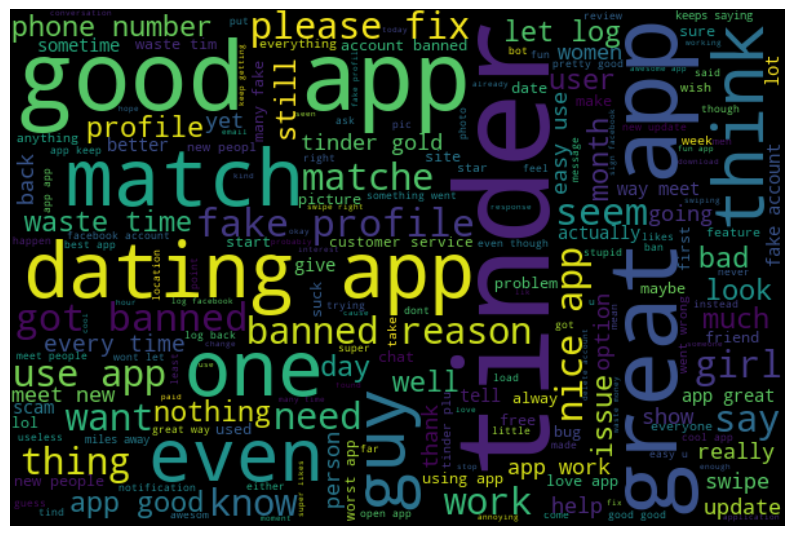

In [47]:
# Tinder
df_tinder = df[df['App'] == 'Tinder'] 

# Word cloud
all_words_lem = ' '.join([word for word in df_tinder['review_string_lem_stem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

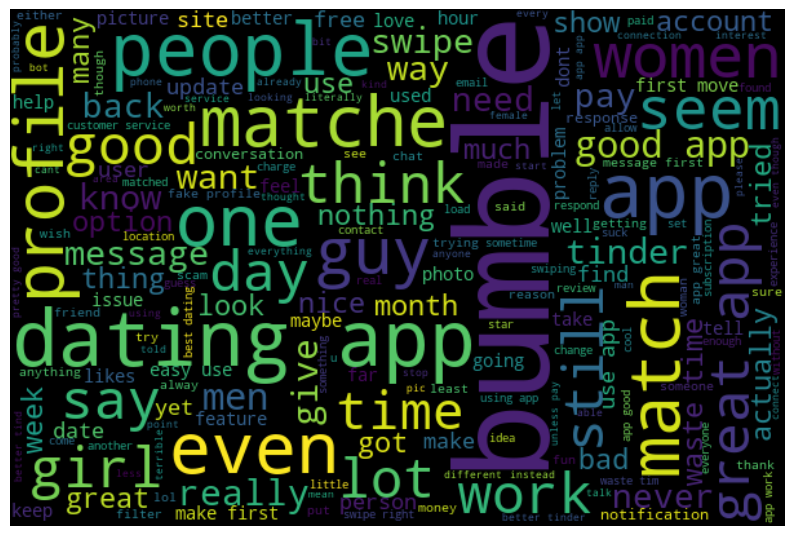

In [48]:
# Bumble
df_bumble = df[df['App'] == 'Bumble'] 

# Word cloud
all_words_lem = ' '.join([word for word in df_bumble['review_string_lem_stem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

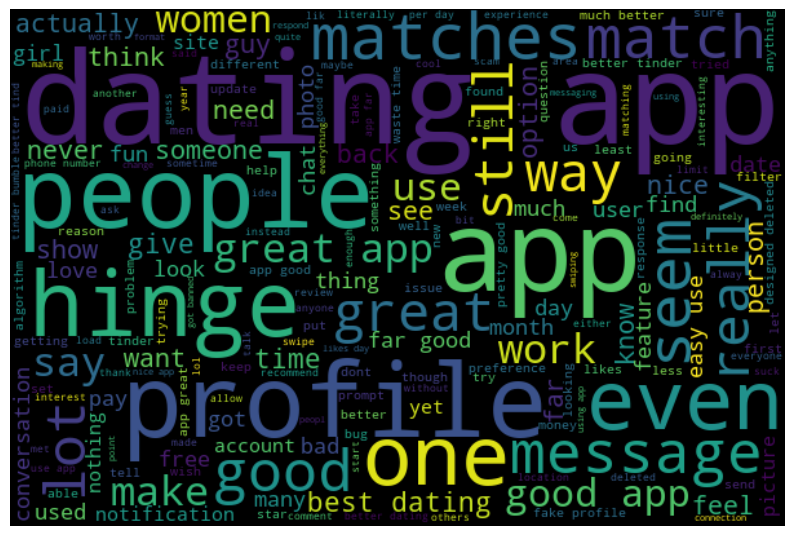

In [49]:
# Hinge
df_hinge = df[df['App'] == 'Hinge'] 

# Word cloud
all_words_lem = ' '.join([word for word in df_hinge['review_string_lem_stem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');